<h1 style="background-color: #80a5d6; font-family: Quicksand; font-weight: 500; color: white; line-height: 3em; padding-left: 1em; "> DỰ ĐOÁN DOANH THU VÀ LỢI NHUẬN SUPERSTORE </h1>

<h5> 📂 Import các thư viện cần thiết </h5>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import tensorflow as tf

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')

<h5> 📂 Đọc dữ liệu và in ra 5 dòng đầu tiên </h5>

In [13]:
df = pd.read_excel("../datasets/global_superstore_clean.xlsx", sheet_name = "Orders")
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,1,MX-2015-SC2057582-42279,2015-10-02,2015-10-06,Standard Class,SC-2057582,Sonia Cooley,Consumer,Mexico City,Distrito Federal,...,OFF-LA-4658,Office Supplies,Labels,"Hon File Folder Labels, Adjustable",13.08,3,0.0,4.56,2.033,Medium
1,2,MX-2013-KW1657028-41562,2013-10-15,2013-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-FU-6238,Furniture,Furnishings,"Tenex Clock, Durable",252.16,8,0.0,90.72,13.449,Medium
2,3,MX-2013-KW1657028-41562,2013-10-15,2013-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,FUR-BO-4845,Furniture,Bookcases,"Ikea 3-Shelf Cabinet, Mobile",193.28,2,0.0,54.08,9.627,Medium
3,4,MX-2013-KW1657028-41562,2013-10-15,2013-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-BI-3720,Office Supplies,Binders,"Cardinal Binder, Clear",35.44,4,0.0,4.96,1.371,Medium
4,5,MX-2013-KW1657028-41562,2013-10-15,2013-10-20,Standard Class,KW-1657028,Kelly Williams,Consumer,Dos Quebradas,Risaralda,...,OFF-AR-5905,Office Supplies,Art,"Sanford Canvas, Water Color",71.60,2,0.0,11.44,3.787,Medium


---

<h3 style="background-color: #80a5d6; font-family: Quicksand; font-weight: 500; color:white; padding: 1em; line-height: 1.5em; "> MỤC TIÊU VÀ HƯỚNG GIẢI QUYẾT BÀI TOÁN </h3>

🔥 **Bài toán:** Dựa trên các đặc trưng về ngày đặt/giao hàng, chế độ vận chuyển, phân khúc khách hàng, thị trường, sản phẩm, số lượng, mức giảm giá... để dự đoán doanh thu và lợi nhuận Superstore thu được ứng với mặt hàng đó.

🔥 Việc dự đoán trước doanh thu và lợi nhuận có rất nhiều lợi ích cho các đối tượng khác nhau như sau:
- **Doanh nghiệp:** điều chỉnh các chiến lược bán hàng để tối đa hóa lợi nhuận; phát hiện ra các khuynh hướng tiêu dùng và hành vi mua hàng của khách hàng, từ đó đưa ra các quyết định kinh doanh phù hợp để thu hút và giữ chân khách hàng.
- **Nhà quản lý:** hiểu rõ hơn về sản phẩm và dịch vụ được ưa chuộng nhất để tối ưu hóa sản xuất và phân phối; cải thiện hiệu quả quản lý đơn hàng và quản lý kho.
- **Nhà đầu tư:** chuẩn bị ngân sách và dự trù tài nguyên tốt hơn để đáp ứng nhu cầu kinh doanh trong tương lai.

🔥 Sử dụng các mô hình <strong>Decision Tree Regression</strong>, <strong>Random Forest Regression</strong> và <strong>TensorFlow neural network</strong>.
- **Bước 1:** Lựa chọn các đặc trưng để đưa vào mô hình.
- **Bước 2:** Tiền xử lý trước khi chạy mô hình.
- **Bước 3:** Xây dựng các mô hình.
- **Bước 4:** Đánh giá các mô hình.

--- 

<h3 style="background-color: #80a5d6; font-family: Quicksand; font-weight: 500; color:white; padding: 1em; line-height: 1.5em; "> CÁC BƯỚC THỰC HIỆN </h3>

<font size="4"> ✈️ <strong>Bước 1:</strong> Lựa chọn các đặc trưng đưa vào mô hình. </font>

Ta chọn ra các đặc trưng có thể ảnh hưởng đến doanh thu và lợi nhuận của Superstore, từ đó dùng các đặc trưng này để huấn luyện cho mô hình. Bỏ đi các thuộc tính không cần thiết *Row ID*, *Customer Name*, *Product Name* và các thuộc tính hướng đến đối tượng khách hàng cụ thể *Order ID*, *Customer ID*.

- **Order Date:** Ngày đặt hàng của sản phẩm.
- **Ship Date:** Ngày giao hàng của sản phẩm.
- **Ship Mode:** Chế độ vận chuyển được khách hàng chỉ định. Có 4 chế độ vận chuyển: First Class, Second Class, Standard Class và Same Day.
- **Segment:** Phân khúc mà khách hàng thuộc về (Thuật ngữ này thường được sử dụng trong kinh doanh để chỉ các nhóm khách hàng với các đặc điểm chung như độ tuổi, giới tính, sở thích, thu nhập, v.v.). Trong bộ dữ liệu trên, các khách hàng được chia làm ba phân khúc bao gồm: Consumer segment (phân khúc người tiêu dùng), Corporate segment (phân khúc doanh nghiệp) , Home Office segment (phân khúc văn phòng tại gia).
- **City:** Thành phố nơi khách hàng đang sinh sống.
- **State:** Bang (hoặc tỉnh thành) nơi khách hàng đang sinh sống.
- **Country:** Quốc gia nơi khách hàng đang sinh sống.
- **Region:** Khu vực nơi khách hàng đang sinh sống. Các khu vực này thường được chia theo các miền đông, tây, nam, bắc hoặc trung tâm của thị trường tương ứng.
- **Market:** Thị trường nơi khách hàng đang sinh sống. Có 5 thị trường trên thế giới là Africa (châu Phi), Asia Pacific (châu Á - Thái Bình Dương), Europe (châu Âu), LATAM (Mỹ Latinh) và USCA (Bắc Mỹ).  
- **Product ID:** Định danh duy nhất của sản phẩm.
- **Category:** Danh mục sản phẩm đã được đặt hàng. Trong bộ dữ liệu, có ba danh mục sản phẩm bao gồm: Furniture (nội thất), Office Supplies (văn phòng phẩm) và Technology (sản phẩm công nghệ).
- **Sub-Category:** Danh mục con của sản phẩm đã được đặt hàng. Trong file dữ liệu, có 17 danh mục sản phẩm con khác nhau đã xuất hiện.
- **Sales:** Giá bán (doanh thu) của các sản phẩm, đơn vị USD.
- **Quantity:** Số lượng sản phẩm.
- **Discount:** Giảm giá được cung cấp cho đơn hàng.
- **Profit:** Lợi nhuận có được từ đơn hàng, đơn vị USD.
- **Shipping Cost:** phí vận chuyển của đơn hàng, đơn vị USD.
- **Order Priority:** mức độ ưu tiên của đơn hàng, có 4 mức là: Critical (rất quan trọng), High (cao), Medium (trung bình) và Low (thấp).

In [14]:
# Giữ lại các đặc trưng đã chọn
df.drop(columns = ["Row ID", "Order ID", "Customer ID", "Customer Name", "Product Name"], axis = 1, inplace = True)
df.head()

,Order Date,Ship Date,Ship Mode,Segment,City,State,Country,Region,Market,Product ID,Category,Sub-Category,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,2015-10-02,2015-10-06,Standard Class,Consumer,Mexico City,Distrito Federal,Mexico,Central America,LATAM,OFF-LA-4658,Office Supplies,Labels,13.08,3,0.0,4.56,2.033,Medium
1,2013-10-15,2013-10-20,Standard Class,Consumer,Dos Quebradas,Risaralda,Colombia,South America,LATAM,FUR-FU-6238,Furniture,Furnishings,252.16,8,0.0,90.72,13.449,Medium
2,2013-10-15,2013-10-20,Standard Class,Consumer,Dos Quebradas,Risaralda,Colombia,South America,LATAM,FUR-BO-4845,Furniture,Bookcases,193.28,2,0.0,54.08,9.627,Medium
3,2013-10-15,2013-10-20,Standard Class,Consumer,Dos Quebradas,Risaralda,Colombia,South America,LATAM,OFF-BI-3720,Office Supplies,Binders,35.44,4,0.0,4.96,1.371,Medium
4,2013-10-15,2013-10-20,Standard Class,Consumer,Dos Quebradas,Risaralda,Colombia,South America,LATAM,OFF-AR-5905,Office Supplies,Art,71.60,2,0.0,11.44,3.787,Medium


---

<font size="4"> ✈️ <strong>Bước 2:</strong> Tiền xử lý trước khi chạy mô hình. </font>

🔥 Đối với các cột có kiểu dữ liệu `datetime` như **Order Date** và **Ship Date**: ta tách ra thành ngày, tháng, năm để đưa vào mô hình.

In [15]:
def encode_dates(df, column):
    df = df.copy()
    df[column] = pd.to_datetime(df[column])
    df[column + '_year'] = df[column].apply(lambda x: x.year)
    df[column + '_month'] = df[column].apply(lambda x: x.month)
    df[column + '_day'] = df[column].apply(lambda x: x.day)
    df = df.drop(column, axis = 1)
    return df

df = encode_dates(df, column = 'Order Date')
df = encode_dates(df, column = 'Ship Date')

🔥 Đối với các cột có kiểu dữ liệu `categorical` ta chuyển đổi về dạng số bằng kỹ thuật **Dummy Encoding**. Dummy Encoding tương tự One-Hot Encoding nhưng sử dụng $N-1$ cột cho $N$ giá trị của biến phân loại. Việc loại bỏ cột cuối cùng nhằm tránh hiện tượng *đa cộng tuyến* giữa các cột.

In [16]:
col_numeric = list(df.select_dtypes(include = np.number))
col_categorical = [x for x in df.columns if x not in col_numeric]

# drop các cột có kiểu DL là số để fix lỗi join vào
new_df = df.copy()
new_df.drop(columns = col_numeric, axis = 1, inplace = True)

# Tham số drop_first = False chỉ định kỹ thuật Dummy Encoding, ngược lại drop_first = True chỉ định kỹ thuật One-Hot Encoding
dummy_df = pd.get_dummies(new_df, columns = col_categorical, drop_first = False)
dummy_df = dummy_df.join(df[col_numeric])
dummy_df.head()

,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,City_Aachen,City_Aalen,City_Aalst,...,Quantity,Discount,Profit,Shipping Cost,Order Date_year,Order Date_month,Order Date_day,Ship Date_year,Ship Date_month,Ship Date_day
0,0,0,0,1,1,0,0,0,0,0,...,3,0.0,4.56,2.033,2015,10,2,2015,10,6
1,0,0,0,1,1,0,0,0,0,0,...,8,0.0,90.72,13.449,2013,10,15,2013,10,20
2,0,0,0,1,1,0,0,0,0,0,...,2,0.0,54.08,9.627,2013,10,15,2013,10,20
3,0,0,0,1,1,0,0,0,0,0,...,4,0.0,4.96,1.371,2013,10,15,2013,10,20
4,0,0,0,1,1,0,0,0,0,0,...,2,0.0,11.44,3.787,2013,10,15,2013,10,20


🔥 Lấy ra cột label là doanh thu ("Sales") và lợi nhuận ("Profit")

In [17]:
y_sales = dummy_df.pop('Sales')
y_profit = dummy_df.pop('Profit')

🔥 Chia `dummy_df` thành hai tập dữ liệu `train` (huấn luyện mô hình) và `test` (kiểm thử và đánh giá các mô hình).

In [18]:
X_train, X_test, y_train_sales, y_test_sales = train_test_split(dummy_df, y_sales, test_size = 0.3, random_state = 0)
X_train, X_test, y_train_profit, y_test_profit = train_test_split(dummy_df, y_profit, test_size = 0.3, random_state = 0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = dummy_df.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns = dummy_df.columns)

---

<font size="4"> ✈️ <strong>Bước 3:</strong> Xây dựng các mô hình. </font>

<h3 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; "> 1. Decision Tree Regression </h3>

In [9]:
# Huấn luyện mô hình Decision Tree Regression trên tập X_train và y_train
decision_tree_reg_sales  = DecisionTreeRegressor().fit(X_train, y_train_sales)
decision_tree_reg_profit = DecisionTreeRegressor().fit(X_train, y_train_profit)

# Dùng mô hình để dự đoán trên tập X_test
dt_pred_sales  = decision_tree_reg_sales.predict(X_test)
dt_pred_profit = decision_tree_reg_profit.predict(X_test)

In [10]:
# Đo độ lỗi "Mean squared error" và "R-squared" của mô hình so với y_test
dt_mse_sales  = mean_squared_error(y_test_sales, dt_pred_sales)
dt_mse_profit = mean_squared_error(y_test_profit, dt_pred_profit)
print('Mean squared error of Sales : %.4f' % dt_mse_sales)
print('Mean squared error of Profit: %.4f' % dt_mse_profit)

dt_r2_sales  = r2_score(y_test_sales, dt_pred_sales)
dt_r2_profit = r2_score(y_test_profit, dt_pred_profit)
print('R-squared of Sales : %.4f' % dt_r2_sales)
print('R-squared of Profit: %.4f' % dt_r2_profit)

Mean squared error of Sales : 102349.2825
Mean squared error of Profit: 24913.6430
R-squared of Sales : 0.6203
R-squared of Profit: 0.2972


<h3 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; "> 2. Random Forest Regression </h3>

In [19]:
# Huấn luyện mô hình Random Forest Regression trên tập X_train và y_train
rf_reg_sales  = RandomForestRegressor(max_depth = 5).fit(X_train, y_train_sales)
rf_reg_profit = RandomForestRegressor(max_depth = 5).fit(X_train, y_train_profit)

# Dùng mô hình để dự đoán trên tập X_test
rf_pred_sales  = rf_reg_sales.predict(X_test)
rf_pred_profit = rf_reg_profit.predict(X_test)

In [20]:
# Đo độ lỗi "Mean squared error" và "R-squared" của mô hình so với y_test
rf_mse_sales  = mean_squared_error(y_test_sales, rf_pred_sales)
rf_mse_profit = mean_squared_error(y_test_profit, rf_pred_profit)
print('Mean squared error of Sales : %.4f' % rf_mse_sales)
print('Mean squared error of Profit: %.4f' % rf_mse_profit)

rf_r2_sales = r2_score(y_test_sales, rf_pred_sales)
rf_r2_profit = r2_score(y_test_profit, rf_pred_profit)
print('R-squared of Sales : %.4f' % rf_r2_sales)
print('R-squared of Profit: %.4f' % rf_r2_profit)

Mean squared error of Sales : 87557.7552
Mean squared error of Profit: 18899.9833
R-squared of Sales : 0.6752
R-squared of Profit: 0.4668


<h3 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; "> 3. TensorFlow neural network </h3>

In [21]:
inputs = tf.keras.Input(shape = (X_train.shape[1],))
x = tf.keras.layers.Dense(256, activation = 'relu')(inputs)
x = tf.keras.layers.Dense(256, activation = 'relu')(x)
outputs = tf.keras.layers.Dense(1, activation = 'linear')(x)

model_sales = tf.keras.Model(inputs = inputs, outputs = outputs)
model_profit = tf.keras.Model(inputs = inputs, outputs = outputs)

print(model_sales.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8773)]            0         
                                                                 
 dense (Dense)               (None, 256)               2246144   
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 1)                 257       
                                                                 
Total params: 2,312,193
Trainable params: 2,312,193
Non-trainable params: 0
_________________________________________________________________
None


In [22]:
model_sales.compile(
    optimizer = 'adam',
    loss = 'mse'
)

history = model_sales.fit(
    X_train,
    y_train_sales,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
898/898 [==============================] - 23s 24ms/step - loss: 154979.3281 - val_loss: 88249.0391 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - 17s 19ms/step - loss: 70715.7344 - val_loss: 72996.1562 - lr: 0.0010
Epoch 3/100
898/898 [==============================] - 15s 17ms/step - loss: 45023.0312 - val_loss: 86833.3750 - lr: 0.0010
Epoch 4/100
898/898 [==============================] - 15s 17ms/step - loss: 28812.0273 - val_loss: 153236.5469 - lr: 0.0010
Epoch 5/100
898/898 [==============================] - 15s 17ms/step - loss: 22443.2188 - val_loss: 267737.6875 - lr: 0.0010
Epoch 6/100
898/898 [==============================] - 15s 17ms/step - loss: 18999.4844 - val_loss: 1143058.6250 - lr: 0.0010
Epoch 7/100
898/898 [==============================] - 15s 16ms/step - loss: 14407.8154 - val_loss: 1042979.5625 - lr: 0.0010


In [23]:
model_profit.compile(
    optimizer = 'adam',
    loss = 'mse'
)

history = model_profit.fit(
    X_train,
    y_train_profit,
    validation_split = 0.2,
    batch_size = 32,
    epochs = 100,
    callbacks = [
        tf.keras.callbacks.EarlyStopping(
            monitor = 'val_loss',
            patience = 5,
            restore_best_weights = True
        ),
        tf.keras.callbacks.ReduceLROnPlateau()
    ]
)

Epoch 1/100
898/898 [==============================] - 18s 20ms/step - loss: 26689.3613 - val_loss: 18529.8770 - lr: 0.0010
Epoch 2/100
898/898 [==============================] - 15s 16ms/step - loss: 15775.8955 - val_loss: 18186.9316 - lr: 0.0010
Epoch 3/100
898/898 [==============================] - 15s 17ms/step - loss: 10730.9688 - val_loss: 24246.3164 - lr: 0.0010
Epoch 4/100
898/898 [==============================] - 15s 17ms/step - loss: 8181.9556 - val_loss: 28976.4805 - lr: 0.0010
Epoch 5/100
898/898 [==============================] - 15s 17ms/step - loss: 6308.6226 - val_loss: 27175.7910 - lr: 0.0010
Epoch 6/100
898/898 [==============================] - 14s 16ms/step - loss: 5139.8799 - val_loss: 70106.2031 - lr: 0.0010
Epoch 7/100
898/898 [==============================] - 15s 16ms/step - loss: 4202.4360 - val_loss: 119631.1250 - lr: 0.0010


In [24]:
test_loss_sales = model_sales.evaluate(X_test, y_test_sales, verbose = 0)
test_loss_profit = model_profit.evaluate(X_test, y_test_profit, verbose = 0)

print("Test Loss of Sales : {:.5f}".format(test_loss_sales))
print("Test Loss of Profit: {:.5f}".format(test_loss_profit))

Test Loss of Sales : 273440.50000
Test Loss of Profit: 24805.60352


In [27]:
y_pred_sales = np.squeeze(model_sales.predict(X_test))
y_pred_profit = np.squeeze(model_profit.predict(X_test))

tnn_mse_sales  = mean_squared_error(y_test_sales, y_pred_sales)
tnn_mse_profit = mean_squared_error(y_test_profit, y_pred_profit)
print('Mean squared error of Sales : %.4f' % tnn_mse_sales)
print('Mean squared error of Profit: %.4f' % tnn_mse_profit)

tnn_r2_sales = r2_score(y_test_sales, y_pred_sales)
tnn_r2_profit = r2_score(y_test_profit, y_pred_profit)
print("R-squared of Sales : {:.5f}".format(tnn_r2_sales))
print("R-squared of Profit: {:.5f}".format(tnn_r2_profit))

481/481 [==============================] - 3s 6ms/step
Mean squared error of Sales : 273440.4506
Mean squared error of Profit: 24805.5926
R-squared of Sales : -0.01441
R-squared of Profit: 0.30021


---

<font size="4"> ✈️ <strong>Bước 4:</strong> Đánh giá các mô hình. </font>

<h3 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; "> In ra Mean squared error và R-squared của các mô hình </h3>

In [45]:
print('Forecasting Sales:')
mse_sales = [dt_mse_sales, rf_mse_sales, tnn_mse_sales]
r2_sales = [dt_r2_sales, rf_r2_sales, tnn_r2_sales]
index = ['Dicision Tree Regression', 'Random Forest Regression', 'TensorFlow Neural Network']
data_sales = {'MSE': mse_sales, 'R2': r2_sales}
measurement_sales = pd.DataFrame(data_sales, index = index)
measurement_sales.index.name = 'Model'
measurement_sales

Forecasting Sales:


,MSE,R2
Model,,
Dicision Tree Regression,102349.282458,0.620303
Random Forest Regression,87557.755217,0.675177
TensorFlow Neural Network,273440.450636,-0.014413


In [46]:
print('Forecasting Profit:')
mse_profit = [dt_mse_profit, rf_mse_profit, tnn_mse_profit]
r2_profit = [dt_r2_profit, rf_r2_profit, tnn_r2_profit]
data_profit = {'MSE': mse_profit, 'R2': r2_profit}
measurement_profit = pd.DataFrame(data_profit, index = index)
measurement_profit.index.name = 'Model'
measurement_profit

Forecasting Profit:


,MSE,R2
Model,,
Dicision Tree Regression,24913.643018,0.297160
Random Forest Regression,18899.983340,0.466812
TensorFlow Neural Network,24805.592616,0.300208


<div style = "color: #80a5d6; padding: 1em; margin-top: 0; ">
    <h5 style = "margin-bottom: 0; font-weight: bold; margin-top: 0; "> 🔥 Nhận xét:</h5>
    <ul style = "padding-right: 1.5em; margin-bottom: 0; ">
        <li> <strong>Mean Squared Error (MSE)</strong> là một độ đo thường được sử dụng để đánh giá chất lượng của một mô hình dự đoán. Nó tính toán trung bình bình phương của sai số giữa các giá trị dự đoán và các giá trị thực tế. MSE càng nhỏ thì mô hình dự đoán càng tốt. Như vậy mô hình <strong>Random Forest Regression dự đoán tốt nhất cả doanh thu và lợi nhuận</strong>. </li>
        <li> <strong>R-square</strong> là một thước đo đánh giá chất lượng của mô hình hồi quy và biểu thị tỉ lệ phần trăm của sự biến động của biến phụ thuộc (y) có thể được giải thích bởi biến độc lập (x) đã chọn cho mô hình. Giá trị R-square nằm trong khoảng từ 0 đến 1, với giá trị càng gần 1 thì mô hình càng tốt. Trong thực tế, mô hình hồi quy với R-square lớn hơn 0,7 được coi là có độ chính xác tốt. Như vậy: 
            <ul style = "padding-right: 2em;">
                <li style = "margin-top: 0.3em; "> <strong>Đối với Doanh thu:</strong> mô hình TensorFlow Neural Network có R2 score = -0.014 < 0, cho thấy mô hình không tốt và dự đoán kém hơn việc dự đoán trung bình. Do đó ta không nên sử dụng mô hình này khi dự đoán doanh thu. Trong khi đó, hai mô hình Dicision Tree Regression và Random Forest Regression có R2 score lần lượt là 0.62 và 0.675, chứng tỏ chúng dự đoán doanh thu khá tốt và Random Forest Regression dự đoán doanh thu tốt nhất. </li>
                <li style = "margin-top: 0.3em; "> <strong>Đối với Lợi nhuận:</strong> Mô hình Random Forest Regression dù khả năng dự đoán lợi nhuận ở mức trung bình (R2 score = 0.467) nhưng cho kết quả tốt hơn hai mô hình còn lại. Theo sau đó là TensorFlow Neural Network (R2 score = 0.3) và sau cùng là Dicision Tree Regression (R2 score = 0.297). </li>
            </ul>
        </li>
    </ul>
</div>

<h3 style="background-color: #80a5d6; font-family:Quicksand; font-weight: 500; color:white;line-height: 3em; padding-left: 1em; "> Trực quan regplot cho giá trị mô hình dự đoán và tập test </h3>

(array([-1000.,  -500.,     0.,   500.,  1000.,  1500.,  2000.,  2500.,
         3000.]),
 [Text(0, -1000.0, '−1000'),
  Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

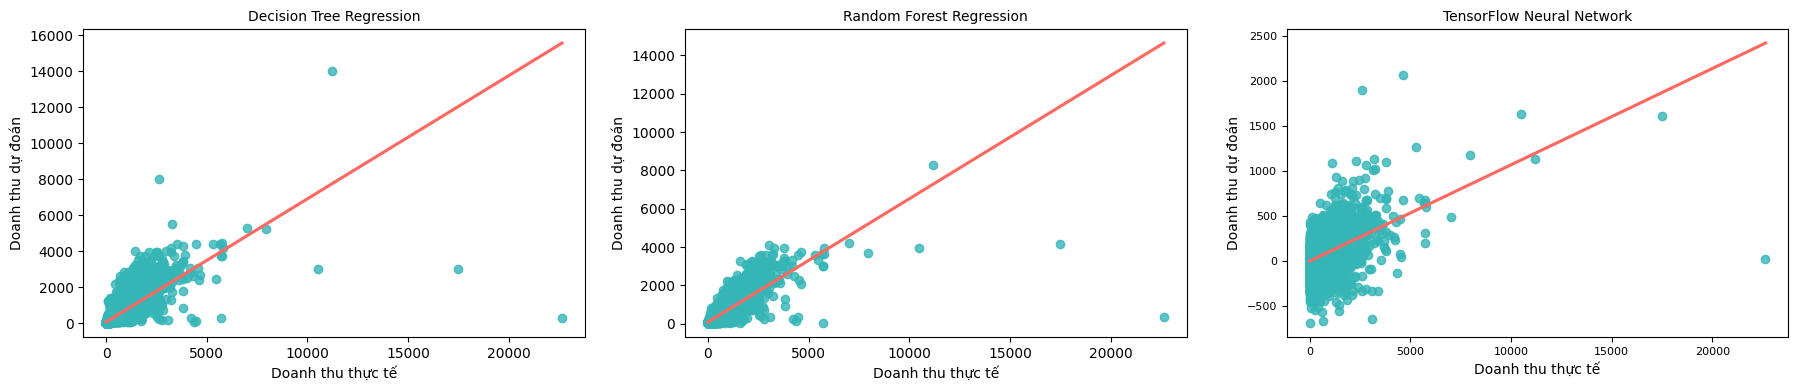

In [57]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 4))

# Biểu đồ 1
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.regplot(x = y_test_sales, y = dt_pred_sales, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax1.set_title('Decision Tree Regression', fontsize = 10)
ax1.set_xlabel('Doanh thu thực tế', fontsize = 10)
ax1.set_ylabel('Doanh thu dự đoán', fontsize = 10)

# Biểu đồ 2
ax2 = plt.subplot(1, 3, 2)
ax2 = sns.regplot(x = y_test_sales, y = rf_pred_sales, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax2.set_title('Random Forest Regression', fontsize = 10)
ax2.set_xlabel('Doanh thu thực tế', fontsize = 10)
ax2.set_ylabel('Doanh thu dự đoán', fontsize = 10)

# Biểu đồ 3
ax3 = plt.subplot(1, 3, 3)
ax3 = sns.regplot(x = y_test_sales, y = y_pred_sales, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax3.set_title('TensorFlow Neural Network', fontsize = 10)
ax3.set_xlabel('Doanh thu thực tế', fontsize = 10)
ax3.set_ylabel('Doanh thu dự đoán', fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

(array([-1500., -1000.,  -500.,     0.,   500.,  1000.,  1500.,  2000.,
         2500.,  3000.]),
 [Text(0, -1500.0, '−1500'),
  Text(0, -1000.0, '−1000'),
  Text(0, -500.0, '−500'),
  Text(0, 0.0, '0'),
  Text(0, 500.0, '500'),
  Text(0, 1000.0, '1000'),
  Text(0, 1500.0, '1500'),
  Text(0, 2000.0, '2000'),
  Text(0, 2500.0, '2500'),
  Text(0, 3000.0, '3000')])

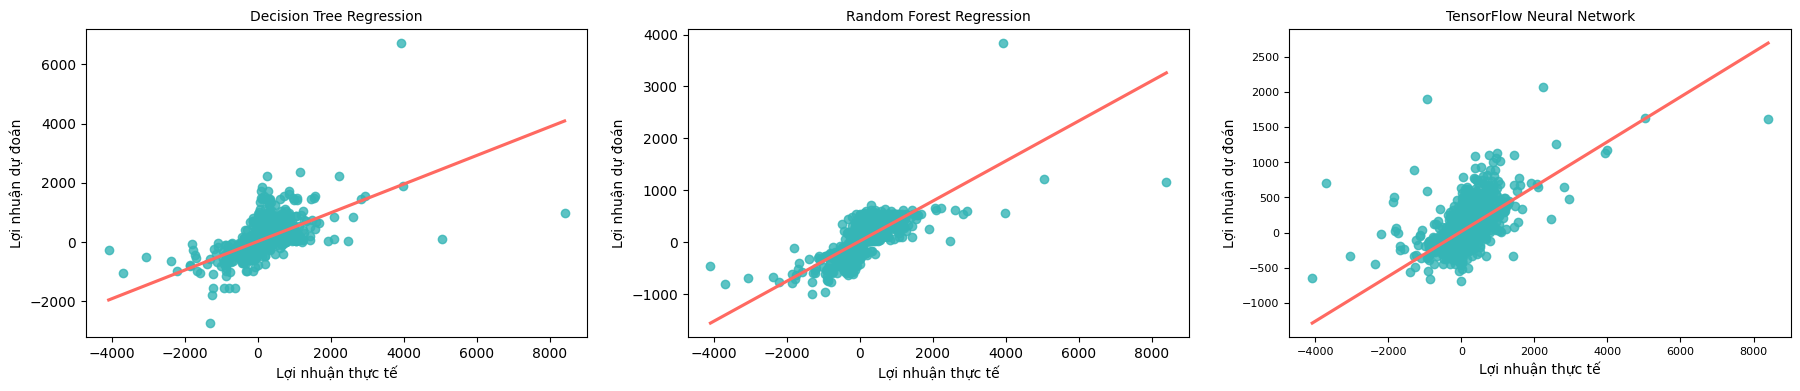

In [58]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (22, 4))

# Biểu đồ 1
ax1 = plt.subplot(1, 3, 1)
ax1 = sns.regplot(x = y_test_profit, y = dt_pred_profit, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax1.set_title('Decision Tree Regression', fontsize = 10)
ax1.set_xlabel('Lợi nhuận thực tế', fontsize = 10)
ax1.set_ylabel('Lợi nhuận dự đoán', fontsize = 10)

# Biểu đồ 2
ax2 = plt.subplot(1, 3, 2)
ax2 = sns.regplot(x = y_test_profit, y = rf_pred_profit, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax2.set_title('Random Forest Regression', fontsize = 10)
ax2.set_xlabel('Lợi nhuận thực tế', fontsize = 10)
ax2.set_ylabel('Lợi nhuận dự đoán', fontsize = 10)

# Biểu đồ 3
ax3 = plt.subplot(1, 3, 3)
ax3 = sns.regplot(x = y_test_profit, y = y_pred_profit, ci = None, scatter_kws = {"color": "#35b5b6"}, line_kws = {"color": "#ff6961"})
ax3.set_title('TensorFlow Neural Network', fontsize = 10)
ax3.set_xlabel('Lợi nhuận thực tế', fontsize = 10)
ax3.set_ylabel('Lợi nhuận dự đoán', fontsize = 10)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)

<div style = "color: #80a5d6; padding: 1em; ">
    <h5 style = "margin: 0; display: inline; font-weight: bold; "> 🔥 Lý do lựa chọn biểu đồ:</h5> <p style = "display: inline; right: 10em; "> Ở đây ta chọn biểu đồ regplot để trực quan vì phù hợp khi kiểm tra tương quan giữa doanh thu (lợi nhuận) dự đoán với doanh thu (lợi nhuận) máy bay thực tế.</p><br>
    <h5 style = "margin-top: 15px; margin-bottom: 0; font-weight: bold; "> 🔥 Nhận xét:</h5>
    <ul style = "padding-right: 1.5em; margin-bottom: 0; ">
        <li style = "margin-top: 0.3em; "> <strong>Đối với Doanh thu:</strong> ... </li>
        <li style = "margin-top: 0.3em; "> <strong>Đối với Lợi nhuận:</strong> ... </li>
    </ul>
</div>

---

<h4 style = "margin-bottom: 0; "> 📂 References: </h4>

- [Encoding Categorical Variables: One-hot vs Dummy Encoding](https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db)

- [Plot multiple plots in Matplotlib](https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib)